In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train=pd.read_csv("Train_UWu5bXk.txt")
test = pd.read_csv("Test_u94Q5KV.txt")

In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data = train.merge(test,how="outer")
data.shape

(14204, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

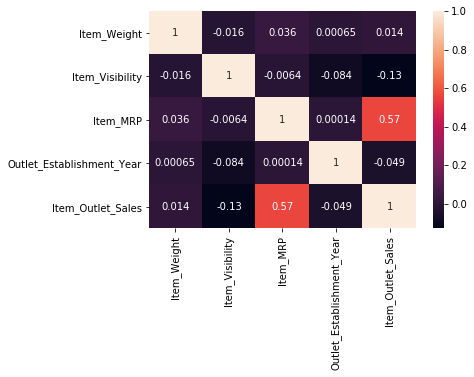

In [14]:
sns.heatmap(data.corr(),annot=True)

## ItemFatContent

In [15]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
data.Item_Fat_Content.replace({"LF":"Low Fat","low fat": "Low Fat","reg":"Regular"},inplace=True)

In [17]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

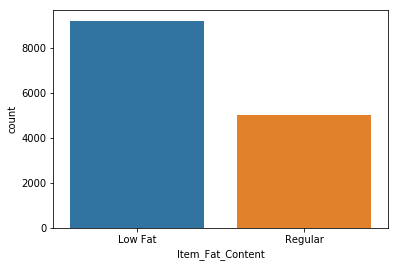

In [18]:
sns.countplot(data.Item_Fat_Content)

In [19]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Item Visibility


In [20]:
data.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

    Item visibility is zero means there is no item in the mart, still it is being sold, which is flaw
    There must be some visibility

In [21]:
train[train.Item_Visibility==0].sort_values(by="Item_Outlet_Sales",ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1450,FDZ20,NaN,Low Fat,0.0,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4346,FDY55,NaN,Low Fat,0.0,Fruits and Vegetables,255.7988,OUT027,1985,Medium,Tier 3,Supermarket Type3,9251.9568
472,FDU56,NaN,Low Fat,0.0,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704
4676,DRE49,NaN,Low Fat,0.0,Soft Drinks,153.8024,OUT027,1985,Medium,Tier 3,Supermarket Type3,7741.9224
7562,FDY39,NaN,Regular,0.0,Meat,182.0608,OUT027,1985,Medium,Tier 3,Supermarket Type3,7717.9536
3255,FDI38,13.350,Regular,0.0,Canned,206.9638,OUT017,2007,NaN,Tier 2,Supermarket Type1,7247.2330
3400,FDE11,17.700,Regular,0.0,Starchy Foods,183.5924,OUT035,2004,Small,Tier 2,Supermarket Type1,7033.5112
5494,FDD33,NaN,Low Fat,0.0,Fruits and Vegetables,231.9642,OUT027,1985,Medium,Tier 3,Supermarket Type3,6970.9260
3863,NCZ18,7.825,Low Fat,0.0,Household,253.4698,OUT017,2007,NaN,Tier 2,Supermarket Type1,6849.0846
1113,FDB21,NaN,Low Fat,0.0,Fruits and Vegetables,242.9854,OUT027,1985,Medium,Tier 3,Supermarket Type3,6767.1912


In [22]:
sns.boxplot(x.Item_Type,x.Item_Visibility)
plt.xticks(rotation=90)

NameError: name 'x' is not defined

In [23]:
data.Item_Visibility.replace(0,data.Item_Visibility.median(),inplace=True)

In [24]:
sns.boxplot(x.Item_Type,x.Item_Visibility)
plt.xticks(rotation=90)

NameError: name 'x' is not defined

In [25]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## ItemMRP

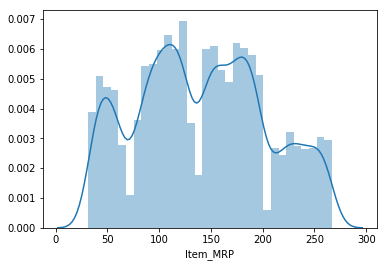

In [26]:
sns.distplot(data.Item_MRP)

    Variety of data is within, multimodal graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

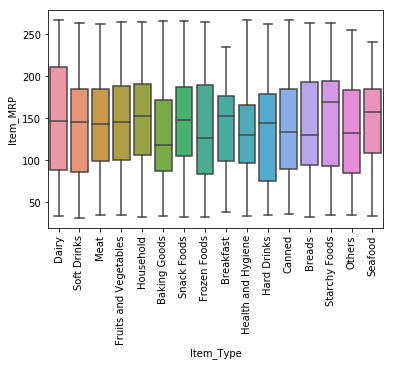

In [27]:
sns.boxplot(data.Item_Type,data.Item_MRP)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text xticklabel objects>)

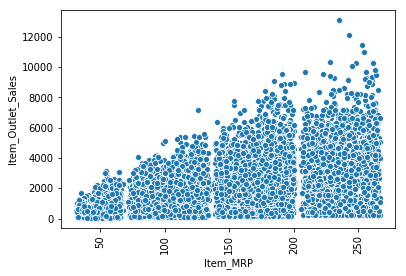

In [28]:
sns.scatterplot(data.Item_MRP,data.Item_Outlet_Sales)
plt.xticks(rotation=90)

In [29]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## ItemIdentifier to category of item

In [30]:
data["Item_Category"] = data.Item_Identifier.str[:2]

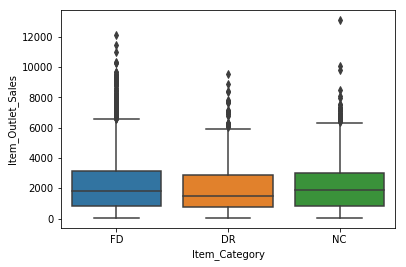

In [31]:
sns.boxplot(data.Item_Category,data.Item_Outlet_Sales)

## ItemWeight

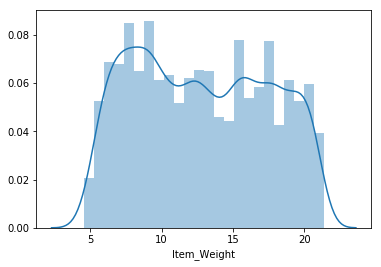

In [32]:
sns.distplot(data.Item_Weight.dropna())

In [33]:
data[data.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,DR
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,FD
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,FD
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,FD
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916,FD
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614,FD
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950,FD
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,FD
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,FD


    filling null values according to the itemidentifier

In [34]:
# for i in data.Item_Identifier:
#     data[data.Item_Identifier==i].Item_Weight.fillna(data[data.Item_Identifier==i].Item_Weight.median(),inplace=True)

In [35]:
data.Item_Weight = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(np.mean(x)))

In [36]:
data[data.Item_Identifier=="FDP10"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196,FD
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842,FD
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842,FD
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086,FD
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708,FD
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464,FD
11896,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD
12371,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,FD
13327,FDP10,19.0,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN,FD


In [37]:
data[data.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category


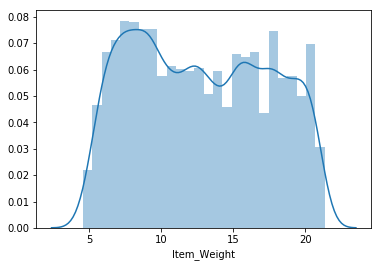

In [38]:
sns.distplot(data.Item_Weight)

In [39]:
# sns.scatterplot(data.Item_MRP,data.Item_Weight)     # no relation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

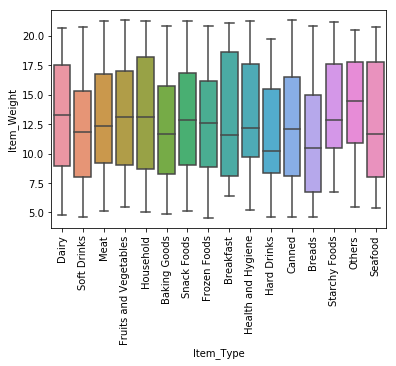

In [40]:
sns.boxplot(data.Item_Type,data.Item_Weight)
plt.xticks(rotation=90)

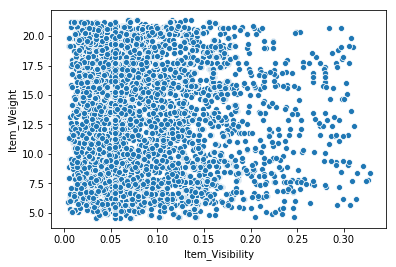

In [41]:
sns.scatterplot(data.Item_Visibility,data.Item_Weight) # no such relation

In [42]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')

### Outlet Identifier

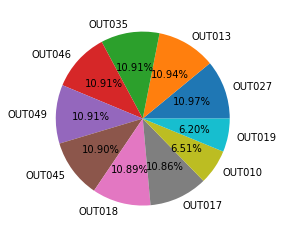

In [43]:
plt.pie(train.Outlet_Identifier.value_counts(),
        labels = train.Outlet_Identifier.value_counts().index,
        autopct="%0.2f%%"
       )
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

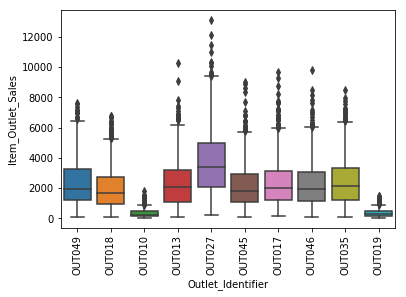

In [44]:
sns.boxplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

In [45]:
data.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
12935,FDC23,18.00,Low Fat,0.017934,Starchy Foods,175.7686,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,FD
303,FDO23,17.85,Low Fat,0.147024,Breads,93.7436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1134.5232,FD
11703,FDD36,13.30,Low Fat,0.021394,Baking Goods,119.8124,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,FD
8094,FDX01,10.10,Low Fat,0.040446,Canned,118.1150,OUT010,1998,NaN,Tier 3,Grocery Store,116.5150,FD


In [46]:
# sns.swarmplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
# plt.xticks(rotation=90)

In [47]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Category                   0
dtype: int64

## Outlet Year

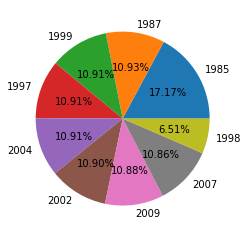

In [48]:
plt.pie(data.Outlet_Establishment_Year.value_counts(),
        labels=data.Outlet_Establishment_Year.value_counts().index,
        autopct="%0.2f%%")
plt.show()

    make age outlet age inspite of year

In [49]:
data["Outlet_Age"] = 2013 - data["Outlet_Establishment_Year"]

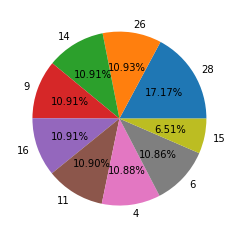

In [50]:
plt.pie(data.Outlet_Age.value_counts(),
        labels=data.Outlet_Age.value_counts().index,
        autopct="%0.2f%%")
plt.show()

In [51]:
train["Outlet_Age"] = 2013 - train["Outlet_Establishment_Year"]

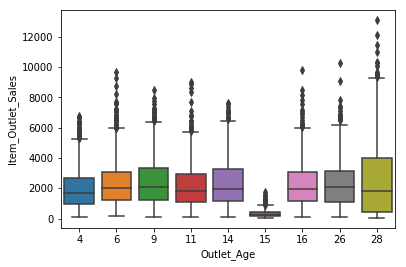

In [52]:
sns.boxplot(train.Outlet_Age,train.Item_Outlet_Sales)

In [53]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Category                   0
Outlet_Age                      0
dtype: int64

## Outlet Location type

In [54]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

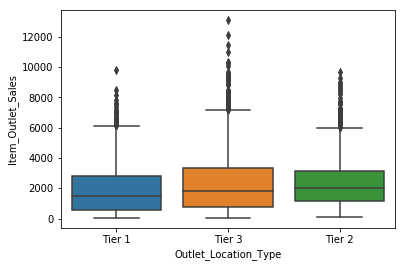

In [55]:
sns.boxplot(train.Outlet_Location_Type,train.Item_Outlet_Sales)

In [56]:
# sns.countplot(hue=data.Outlet_Location_Type,x = data.Outlet_Identifier)
# plt.xticks(rotation=90)
# plt.show()
pd.crosstab( data.Outlet_Location_Type,data.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550
Tier 2,0,0,1543,0,0,0,1550,1548,0,0
Tier 3,925,1553,0,1546,0,1559,0,0,0,0


In [57]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Category                   0
Outlet_Age                      0
dtype: int64

## Outlet type

In [58]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [59]:
pd.crosstab(data.Outlet_Type,data.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,880,0,925
Supermarket Type1,3100,4641,1553
Supermarket Type2,0,0,1546
Supermarket Type3,0,0,1559


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

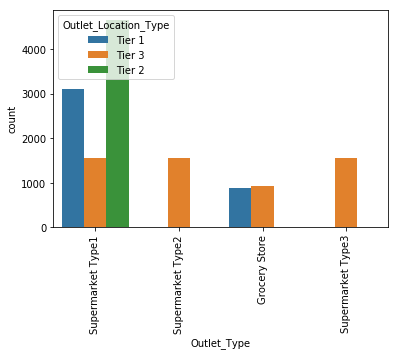

In [60]:
sns.countplot(data.Outlet_Type,hue = data.Outlet_Location_Type)
plt.xticks(rotation=90)

    sm3,sm2 -> t3
    tier2 -> sm1

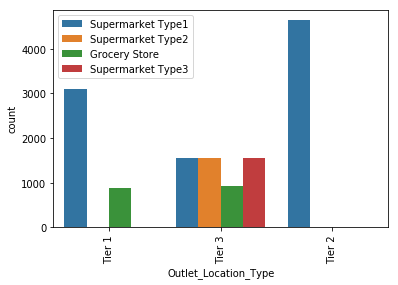

In [61]:
sns.countplot(data.Outlet_Location_Type,hue = data.Outlet_Type)
plt.xticks(rotation=90)
plt.legend()
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

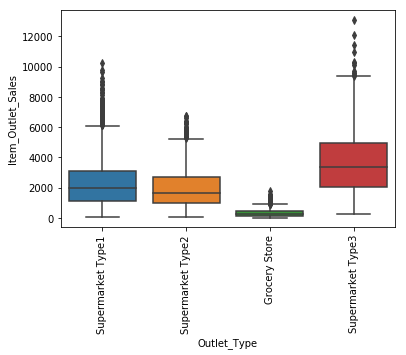

In [62]:
sns.boxplot(data.Outlet_Type,data.Item_Outlet_Sales)
plt.xticks(rotation=90)

In [63]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Category                   0
Outlet_Age                      0
dtype: int64

## OutletSize

In [64]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [65]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
2693,FDF57,14.50,Regular,0.058543,Fruits and Vegetables,168.6448,OUT027,1985,Medium,Tier 3,Supermarket Type3,3408.8960,FD,28
9143,FDD09,13.50,Low Fat,0.035981,Fruits and Vegetables,180.8976,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,FD,15
717,NCQ38,16.35,Low Fat,0.013421,Others,104.8280,OUT018,2009,Medium,Tier 3,Supermarket Type2,1810.9760,NC,4
9495,FDF17,5.19,Low Fat,0.042414,Frozen Foods,196.3110,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,FD,28
1102,FDW48,18.00,Low Fat,0.008589,Baking Goods,81.0618,OUT017,2007,NaN,Tier 2,Supermarket Type1,1450.1124,FD,6


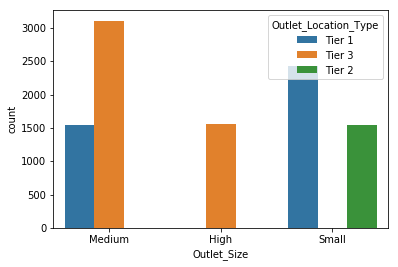

In [66]:
sns.countplot(data.Outlet_Size,hue=data.Outlet_Location_Type)

tier2->small

high->tier3

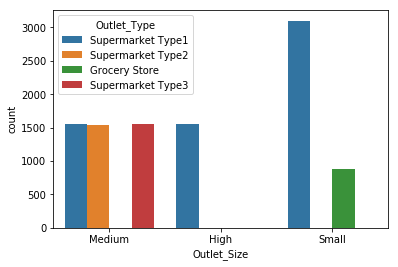

In [67]:
sns.countplot(data.Outlet_Size,hue=data.Outlet_Type)

    grocery-> small
    sm3,sm2-> medium
    high-> sm1

In [68]:
d=data[data.Outlet_Size.isna()]
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
3,FDX07,19.200,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,FD,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,FD,6
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,NC,6
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,FD,15
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,FD,15
33,FDO23,17.850,Low Fat,0.054021,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,FD,11
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004,FD,15
46,NCP05,19.600,Low Fat,0.054021,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,NC,11
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972,FD,11


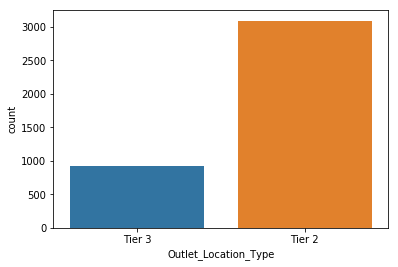

In [69]:
sns.countplot(d.Outlet_Location_Type)

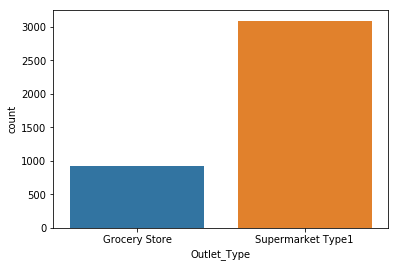

In [70]:
sns.countplot(d.Outlet_Type)

In [71]:
# d.groupby("Outlet_Type").Outlet_Size.transform(lambda x: "Small" if (x[0]=="Grocery Store"))

In [72]:
# data[data.Outlet_Size.isna()].Outlet_Type == "Grocery Store"
# for i in index:
#     print(data[(data.index==i) & (data.Outlet_Type == "Grocery Store")])
#     data.iloc[i,8]
#     print(i)
    


In [73]:

# data.Item_Weight = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(np.mean(x)))
# d[d.Outlet_Location_Type=="Tier 2"].Outlet_Size = "small"
# d.Outlet_Size = 
# d.groupby("Outlet_Location_Type").Outlet_Size.transform(lambda x: x.fillna(x.mode()))

# for i in data[data.Outlet_Size.isna()].index:
# #     d=data.iloc[i]
# #     if d.Outlet_Location_Type == "Tier 2":
#     print(data.iloc[i].Outlet_Location_Type,data.iloc[i].Outlet_Type)
    

In [74]:
# d[d.Outlet_Size.isna()].sort_values(by="Outlet_Type")

In [75]:
# d = data.copy()
# d.sort_values(by="Outlet_Location_Type")

In [76]:
data.Outlet_Size.fillna("Small",inplace=True)

In [77]:
data.Outlet_Size.isna().sum()

0

    All of the null values were either from tier2 or from grocery store and both seperately are in small outlet size

In [78]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Category                   0
Outlet_Age                      0
dtype: int64

In [79]:
test.shape

(5681, 11)

## ItemCategory

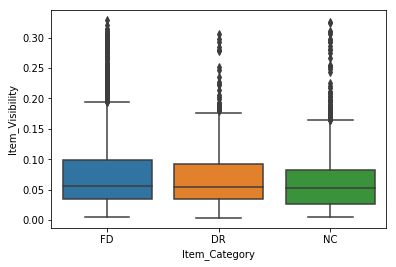

In [80]:
sns.boxplot(data.Item_Category,data.Item_Visibility)

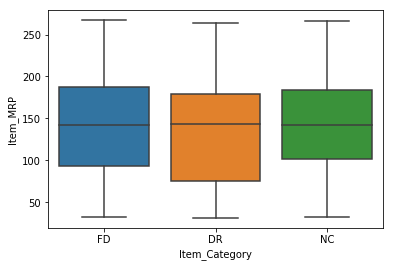

In [81]:
sns.boxplot(data.Item_Category,data.Item_MRP)

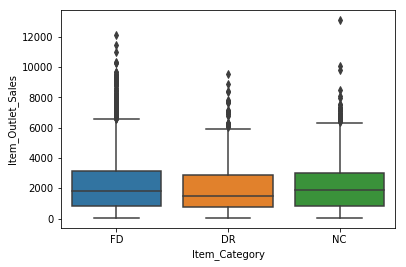

In [82]:
sns.boxplot(data.Item_Category,data.Item_Outlet_Sales)

## Data is Cleaned, null values are removed

In [83]:
d=data.copy()
data.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
5500,FDG32,19.850,Low Fat,0.175143,Fruits and Vegetables,222.3772,OUT027,1985,Medium,Tier 3,Supermarket Type3,9562.2196,FD,28
7224,FDM28,15.700,Low Fat,0.045274,Frozen Foods,177.9660,OUT049,1999,Medium,Tier 1,Supermarket Type1,3415.5540,FD,14
13991,DRM47,9.300,Low Fat,0.044033,Hard Drinks,191.1846,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,DR,6
11093,FDB36,5.465,Regular,0.054021,Baking Goods,129.2626,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,FD,14
2742,NCV41,14.350,Low Fat,0.016956,Health and Hygiene,109.3228,OUT027,1985,Medium,Tier 3,Supermarket Type3,2431.5016,NC,28


In [84]:
# from sklearn.preprocessing import StandardScaler

In [85]:
# ss = StandardScaler()

In [86]:
# ss.fit_transform(d[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Age"]])

# Encoding


In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
# d = d.drop("Item_Identifier",axis=1)
le = LabelEncoder()

In [89]:
d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [90]:
d.Item_Fat_Content = le.fit_transform(d.Item_Fat_Content)

In [91]:
d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,1,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,0,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [92]:
le.fit_transform(d.Outlet_Size)

array([1, 1, 1, ..., 2, 2, 2])

In [93]:
d.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
14199,FDB58,10.5,1,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,16
14200,FDD47,7.6,1,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,4
14201,NCO17,10.0,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,NC,11
14202,FDJ26,15.3,1,0.054021,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,FD,6
14203,FDU37,9.5,1,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,FD,11


    Converting SML to aphabetically sorted for getting 012

In [94]:
d.Outlet_Size.replace(["Small","Medium","High"],[0,1,2],inplace=True)

In [95]:
d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,1,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,0,0.054021,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,NC,26


In [96]:
d.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
14199,FDB58,10.5,1,0.013496,Snack Foods,141.3154,OUT046,1997,0,Tier 1,Supermarket Type1,NaN,FD,16
14200,FDD47,7.6,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2,NaN,FD,4
14201,NCO17,10.0,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,0,Tier 2,Supermarket Type1,NaN,NC,11
14202,FDJ26,15.3,1,0.054021,Canned,214.6218,OUT017,2007,0,Tier 2,Supermarket Type1,NaN,FD,6
14203,FDU37,9.5,1,0.104720,Canned,79.7960,OUT045,2002,0,Tier 2,Supermarket Type1,NaN,FD,11


    Similarily for Outlet_Location_Type

In [97]:
d.Outlet_Location_Type = le.fit_transform(d.Outlet_Location_Type)

In [98]:
d.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
11781,NCL18,18.850,0,0.167924,Household,193.7136,OUT045,2002,0,1,Supermarket Type1,NaN,NC,11
3876,NCI06,11.300,0,0.047792,Household,180.7660,OUT049,1999,1,0,Supermarket Type1,5033.4480,NC,14
9972,NCI06,11.300,0,0.047709,Household,178.3660,OUT035,2004,0,1,Supermarket Type1,NaN,NC,9
2382,FDX45,16.750,0,0.105449,Snack Foods,156.1630,OUT017,2007,0,1,Supermarket Type1,782.3150,FD,6
6688,DRM35,9.695,0,0.070103,Hard Drinks,179.4344,OUT027,1985,1,2,Supermarket Type3,5888.3352,DR,28
4780,FDA43,10.895,0,0.108254,Fruits and Vegetables,194.8794,OUT010,1998,0,2,Grocery Store,585.2382,FD,15
7378,FDJ26,15.300,1,0.085110,Canned,215.7218,OUT018,2009,1,2,Supermarket Type2,1923.4962,FD,4
9018,FDB09,16.250,0,0.057118,Fruits and Vegetables,124.8046,OUT027,1985,1,2,Supermarket Type3,NaN,FD,28
11734,FDD26,8.710,1,0.072268,Canned,184.8924,OUT049,1999,1,0,Supermarket Type1,NaN,FD,14
7120,FDD45,8.615,0,0.116723,Fruits and Vegetables,95.4436,OUT018,2009,1,2,Supermarket Type2,567.2616,FD,4


In [99]:
d=d.drop("Outlet_Establishment_Year",axis=1)
d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,1,0.054021,Fruits and Vegetables,182.0950,OUT010,0,2,Grocery Store,732.3800,FD,15
4,NCD19,8.93,0,0.054021,Household,53.8614,OUT013,2,2,Supermarket Type1,994.7052,NC,26


In [100]:
dummied_data = pd.get_dummies(d.drop("Item_Identifier",axis=1))
dummied_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.30,0,0.016047,249.8092,1,0,3735.1380,14,0,0,...,0,0,1,0,1,0,0,0,1,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,4,0,0,...,0,0,0,0,0,1,0,1,0,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,14,0,0,...,0,0,1,0,1,0,0,0,1,0
3,19.20,1,0.054021,182.0950,0,2,732.3800,15,0,0,...,0,0,0,1,0,0,0,0,1,0
4,8.93,0,0.054021,53.8614,2,2,994.7052,26,0,0,...,0,0,0,0,1,0,0,0,0,1


In [101]:
dummied_data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
10179,11.50,0,0.174498,128.8652,0,1,NaN,6,0,0,...,0,0,0,0,1,0,0,0,1,0
1428,15.70,1,0.008785,204.9980,0,1,5366.3480,6,0,0,...,0,0,0,0,1,0,0,0,1,0
2250,8.60,0,0.090191,112.9176,0,0,458.0704,16,0,0,...,0,1,0,0,1,0,0,0,0,1
8003,18.75,0,0.052917,190.6504,0,1,1342.2528,11,0,0,...,1,0,0,0,1,0,0,0,1,0
1757,7.05,1,0.055559,224.7088,0,0,3131.9232,16,0,1,...,0,1,0,0,1,0,0,0,1,0


# Splitting y from X:  target away from predictors

In [102]:
X = dummied_data.drop("Item_Outlet_Sales",axis=1)
y = dummied_data.Item_Outlet_Sales

In [103]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.30,0,0.016047,249.8092,1,0,14,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,5.92,1,0.019278,48.2692,1,2,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,17.50,0,0.016760,141.6180,1,0,14,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,19.20,1,0.054021,182.0950,0,2,15,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,8.93,0,0.054021,53.8614,2,2,26,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Outlier 

In [105]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [106]:
data_with_outlier = pd.DataFrame(mms.fit_transform(X),columns=X.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [107]:
data_with_outlier.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.416667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.416667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.871986,1.0,0.155306,0.640093,0.0,1.0,0.458333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.0,0.155306,0.095805,1.0,1.0,0.916667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Splitting data to train test

In [108]:
X.iloc[train.Item_Fat_Content.count()]

Item_Weight                         20.750000
Item_Fat_Content                     0.000000
Item_Visibility                      0.007565
Item_MRP                           107.862200
Outlet_Size                          1.000000
Outlet_Location_Type                 0.000000
Outlet_Age                          14.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      0.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                1.000000
Item_Type_Soft Drinks             

In [109]:
y.iloc[len(train)]

nan

In [110]:
data_with_outlier.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.416667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.416667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.871986,1.0,0.155306,0.640093,0.0,1.0,0.458333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.0,0.155306,0.095805,1.0,1.0,0.916667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [111]:
Xtrain = data_with_outlier.iloc[:len(train)]
Xtest = data_with_outlier.iloc[len(train):]
ytrain = y.iloc[:len(train)]
ytest = y.iloc[len(train):]

# Applying Regression

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
regressor = LinearRegression()

In [114]:
regressor.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
ypred = regressor.predict(Xtrain)

In [116]:
from sklearn.metrics import r2_score, mean_squared_error

In [117]:
r2_score(ytrain,ypred)

0.5636590856643473

In [118]:
np.sqrt(mean_squared_error(ytrain,ypred))

1127.1810638482045

In [119]:
data_with_outlier.Item_MRP.describe()

count    14204.000000
mean         0.465686
std          0.263529
min          0.000000
25%          0.266224
50%          0.470958
75%          0.656055
max          1.000000
Name: Item_MRP, dtype: float64


# Backward Elimination

In [120]:
import statsmodels.formula.api as smfa

In [121]:
data_with_outlier["Constant"] = 1
Xtrain = data_with_outlier.iloc[:len(train)]
Xtest = data_with_outlier.iloc[len(train):]
ytrain = y.iloc[:len(train)]
ytest = y.iloc[len(train):]

In [122]:
model = smfa.OLS(ytrain,Xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.4
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:23:01   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.442e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                         1.1810     44.614      0.026      0.979     -86.274      88.636
Item_Fat_Content                   42.1433     28.466      1.480      0.139     -13.657      97.943
Item_Visibility                   -81.4514     85.744     -0.950      0.342    -249.531      86.628
Item_MRP                         3668.1812     46.682     78.578      0.000    3576.673    3759.690
Outlet_Size                       213.9865     16.245     13.173      0.000     182.143     245.830
Outlet_Location_Type              139.6406     19.212      7.269      0.000     101.981     177.300
Outlet_Age                         39.4384     17.156      2.299      0.022       5.809      73.068
Item_Type_Baking Goods              1.6117     49.536      0.033      0.974     -95.491      98.714
Item_Type_Breads                    7.3361     71.502      0.103      0.918    -132.825     147.497
Item_Type_Breakfast                 7.2843    103.437      0.070      0.944    -195.477     210.046
Item_Type_Canned                   26.8428     49.394      0.543      0.587     -69.982     123.668
Item_Type_Dairy                   -49.3831     44.339     -1.114      0.265    -136.299      37.533
Item_Type_Frozen Foods            -26.6913     45.138     -0.591      0.554    -115.173      61.791
Item_Type_Fruits and Vegetables    30.9080     40.616      0.761      0.447     -48.709     110.525
Item_Type_Hard Drinks             -43.2166    114.247     -0.378      0.705    -267.168     180.735
Item_Type_Health and Hygiene       12.8220     44.674      0.287      0.774     -74.750     100.393
Item_Type_Household               -16.4602     39.105     -0.421      0.674     -93.116      60.195
Item_Type_Meat                      0.7976     57.833      0.014      0.989    -112.569     114.164
Item_Type_Others                    1.2698     65.882      0.019      0.985    -127.874     130.414
Item_Type_Seafood                 186.0424    133.416      1.394      0.163     -75.485     447.570
Item_Type_Snack Foods             -10.2024     40.916     -0.249      0.803     -90.407      70.002
Item_Type_Soft Drinks             -71.0622    101.996     -0.697      0.486    -271.000     128.876
Item_Type_Starchy Foods            22.7020     90.261      0.252      0.801    -154.232     199.636
Outlet_Identifier_OUT010         -581.1176     28.500    -20.390      0.000    -636.985    -525.250
Outlet_Identifier_OUT013         -227.6829     20.354    -11.186      0.000    -267.581    -187.785
Outlet_Identifier_OUT017          162.3646     31.905      5.089      0.000      99.824     224.905
Outlet_Identifier_OUT018          -32.5449     15.929     -2.043      0.041     -63.769      -1.321
Outlet_Identifier_OUT019         -444.9647     26.644    -16.700      0.000    -497

In [123]:
# model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat"],axis=1)).fit()
# model.summary()

In [124]:
# model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat","Item_Type_Others"],axis=1)).fit()
# model.summary()

In [125]:
# model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat","Item_Type_Others","Item_Category_NC"],axis=1)).fit()
# model.summary()

In [126]:
# model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat","Item_Type_Others","Item_Category_NC","Item_Type_Baking Goods"],axis=1)).fit()
# model.summary()

In [127]:
# model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat","Item_Type_Others","Item_Category_NC","Item_Type_Baking Goods","Item_Type_Breakfast"],axis=1)).fit()
# model.summary()

In [128]:
model = smfa.OLS(ytrain,Xtrain.drop(["Item_Type_Meat",
                                     "Item_Type_Others",
                                     "Item_Category_NC",
                                     "Item_Type_Baking Goods",
                                     "Item_Type_Breakfast",
                                     "Item_Type_Breads",
                                     "Item_Weight",
                                     "Item_Type_Health and Hygiene",
                                     "Item_Type_Starchy Foods",
                                     "Item_Category_FD",
                                     "Item_Type_Snack Foods",
                                    "Item_Type_Hard Drinks",
                                     "Item_Category_DR",
                                     "Item_Type_Soft Drinks",
                                     "Item_Type_Frozen Foods",
                                     "Outlet_Identifier_OUT045",
                                     "Item_Type_Dairy",
                                     "Item_Type_Household",
                                     "Item_Type_Canned",
                                     "Item_Visibility",
                                     "Item_Type_Fruits and Vegetables",
                                     "Item_Type_Seafood"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     998.5
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:23:03   Log-Likelihood:                -71991.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Fat_Content                 50.3786     25.580      1.969      0.049       0.235     100.522
Item_MRP                       3665.6014     46.248     79.260      0.000    3574.945    3756.258
Outlet_Size                     228.0114     30.831      7.395      0.000     167.574     288.449
Outlet_Location_Type            133.6969     21.739      6.150      0.000      91.084     176.310
Outlet_Age                       39.2586     16.408      2.393      0.017       7.095      71.422
Outlet_Identifier_OUT010       -578.6435     31.031    -18.647      0.000    -639.472    -517.815
Outlet_Identifier_OUT013       -220.4564     25.014     -8.813      0.000    -269.489    -171.424
Outlet_Identifier_OUT017        179.5515     52.479      3.421      0.001      76.679     282.424
Outlet_Identifier_OUT018        -30.3455     16.143     -1.880      0.060     -61.989       1.298
Outlet_Identifier_OUT019       -449.3966     26.541    -16.932      0.000    -501.424    -397.369
Outlet_Identifier_OUT027        813.9627     15.435     52.734      0.000     783.706     844.220
Outlet_Identifier_OUT035        215.7335     52.494      4.110      0.000     112.833     318.634
Outlet_Identifier_OUT046        126.2720     45.731      2.761      0.006      36.627     215.917
Outlet_Identifier_OUT049        113.3183     34.663      3.269      0.001      45.370     181.267
Outlet_Type_Grocery Store     -1028.0400     20.069    -51.226      0.000   -1067.379    -988.701
Outlet_Type_Supermarket Type1   317.4931     25.855     12.280      0.000     266.811     368.175
Outlet_Type_Supermarket Type2   -30.3455     16.143     -1.880      0.060     -61.989       1.298
Outlet_Type_Supermarket Type3   813.9627     15.435     52.734      0.000     783.706     844.220
Constant                         73.0703     19.409      3.765      0.000      35.023     111.117
==============================================================================
Omnibus:                      966.646   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.034
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       5.173   Cond. No.                     4.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [129]:
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

In [130]:
selector = SequentialFeatureSelector(regressor,k_features=25,forward=False)

NameError: name 'SequentialFeatureSelector' is not defined

In [131]:
s = selector.fit(Xtrain,ytrain)

NameError: name 'selector' is not defined

In [132]:
Xtrain.columns[list(s.k_feature_idx_)].to_list()

NameError: name 's' is not defined

In [133]:
lr=LinearRegression()
lr.fit(Xtrain[Xtrain.columns[list(s.k_feature_idx_)].to_list()],ytrain)

NameError: name 's' is not defined

In [190]:
predicted1 = lr.predict(Xtest[Xtrain.columns[list(s.k_feature_idx_)].to_list()])

In [191]:
final = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier":test.Outlet_Identifier,
             "Item_Outlet_Sales":predicted1})

In [192]:
pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier":test.Outlet_Identifier,
             "Item_Outlet_Sales":predicted1})

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1826.0
1,FDW14,OUT017,1554.0
2,NCN55,OUT010,1884.0
3,FDQ58,OUT017,2558.0
4,FDY38,OUT027,5200.0
5,FDH56,OUT046,1922.0
6,FDL48,OUT018,596.0
7,FDC48,OUT027,2776.0
8,FDN33,OUT045,1508.0
9,FDA36,OUT017,3062.0


In [193]:
final.to_csv("final.csv",index=False)

In [196]:
lr.fit(Xtrain.drop(["Item_Type_Meat",
                                     "Item_Type_Others",
                                     "Item_Category_NC",
                                     "Item_Type_Baking Goods",
                                     "Item_Type_Breakfast",
                                     "Item_Type_Breads",
                                     "Item_Weight",
                                     "Item_Type_Health and Hygiene",
                                     "Item_Type_Starchy Foods",
                                     "Item_Category_FD",
                                     "Item_Type_Snack Foods",
                                    "Item_Type_Hard Drinks",
                                     "Item_Category_DR",
                                     "Item_Type_Soft Drinks",
                                     "Item_Type_Frozen Foods",
                                     "Outlet_Identifier_OUT045",
                                     "Item_Type_Dairy",
                                     "Item_Type_Household",
                                     "Item_Type_Canned",
                                     "Item_Visibility",
                                     "Item_Type_Fruits and Vegetables",
                                     "Item_Type_Seafood"],axis=1),ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
p = lr.predict(Xtest.drop(["Item_Type_Meat",
                                     "Item_Type_Others",
                                     "Item_Category_NC",
                                     "Item_Type_Baking Goods",
                                     "Item_Type_Breakfast",
                                     "Item_Type_Breads",
                                     "Item_Weight",
                                     "Item_Type_Health and Hygiene",
                                     "Item_Type_Starchy Foods",
                                     "Item_Category_FD",
                                     "Item_Type_Snack Foods",
                                    "Item_Type_Hard Drinks",
                                     "Item_Category_DR",
                                     "Item_Type_Soft Drinks",
                                     "Item_Type_Frozen Foods",
                                     "Outlet_Identifier_OUT045",
                                     "Item_Type_Dairy",
                                     "Item_Type_Household",
                                     "Item_Type_Canned",
                                     "Item_Visibility",
                                     "Item_Type_Fruits and Vegetables",
                                     "Item_Type_Seafood"],axis=1))